In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


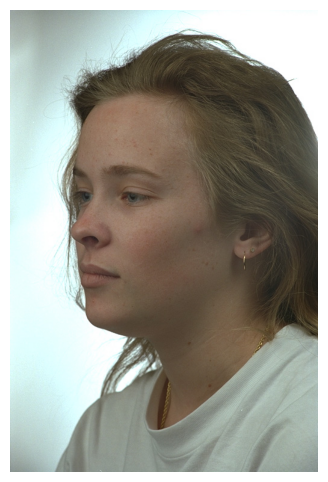

In [4]:
# Load image
#IMAGES - /content/drive/MyDrive/COLAB/Project/images/img (152).jpg  ---- /content/drive/MyDrive/COLAB/Project/images/img (294).jpg ---- /content/drive/MyDrive/COLAB/Project/images/img (447).jpg --- /content/drive/MyDrive/COLAB/Project/images/img (735).jpg
img = cv2.imread("/content/drive/MyDrive/COLAB/Project/images/img (447).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#show
plt.figure(figsize=(15,6))
plt.imshow(img)
plt.axis('off')
plt.show()

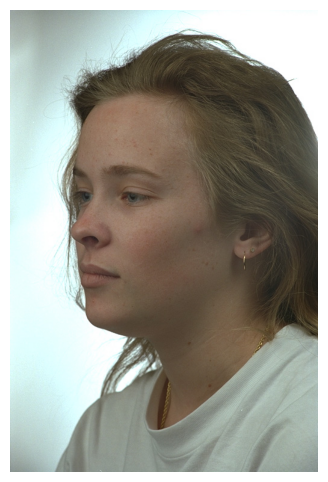

In [5]:
#Preprocessing
img_blur = cv2.GaussianBlur(img, (7, 7), 0)
#show
plt.figure(figsize=(15,6))
plt.imshow(img)
plt.axis('off')
plt.show()

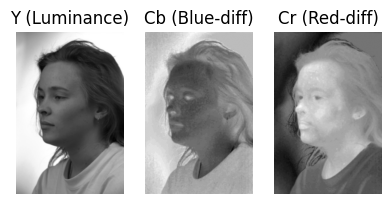

In [6]:
# Convert to YCbCr
ycbcr = cv2.cvtColor(img_blur, cv2.COLOR_RGB2YCrCb)
Y, Cr, Cb = cv2.split(ycbcr)

plt.subplot(1,4,2)
plt.imshow(Y, cmap='gray')
plt.title("Y (Luminance)")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(Cb, cmap='gray')
plt.title("Cb (Blue-diff)")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(Cr, cmap='gray')
plt.title("Cr (Red-diff)")
plt.axis("off")

plt.show()

In [7]:
#MASK 1 - YCbCr precise skin threshold
mask1 = (Cr >= 135) & (Cr <= 180) & (Cb >= 85) & (Cb <= 135)

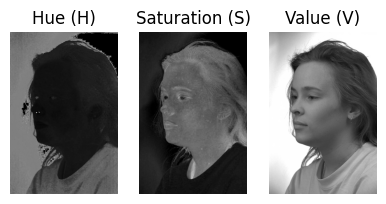

In [8]:
#hsv mask
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(hsv)

#SHOW
plt.subplot(1,4,2)
plt.imshow(H, cmap='gray')
plt.title("Hue (H)")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(S, cmap='gray')
plt.title("Saturation (S)")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(V, cmap='gray')
plt.title("Value (V)")
plt.axis("off")

plt.show()



In [9]:
#Mask 2 - HSV precise skin threshold
#mask2 = (H < 25) & (S > 40) & (V > 40)

In [10]:
#Oring
#skinmask =mask1 || mask2
skinmask = mask1.astype(np.uint8)


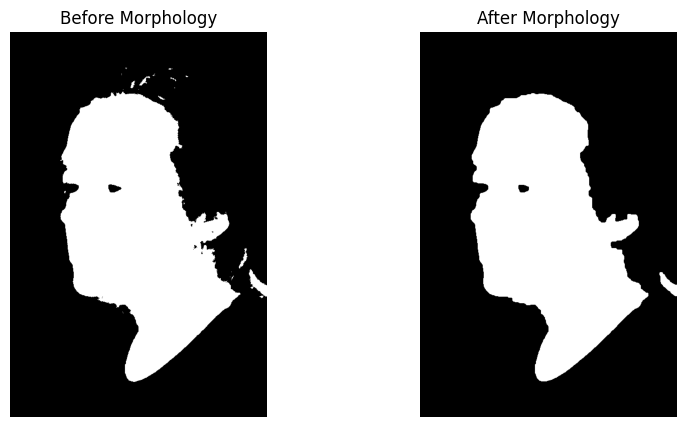

In [15]:
#Step 3 — Morphological cleaning
kernel = np.ones((7,7), np.uint8)

mask_clean = cv2.morphologyEx(skinmask, cv2.MORPH_OPEN, kernel)   # remove tiny dots
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel) # fill holes
mask_clean = cv2.GaussianBlur(mask_clean, (7,7), 0)          # smooth edges


#show
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title("Before Morphology"); plt.imshow(skinmask, cmap='gray'); plt.axis('off')

plt.subplot(1,3,2); plt.title("After Morphology"); plt.imshow(mask_clean, cmap='gray'); plt.axis('off')
plt.show()


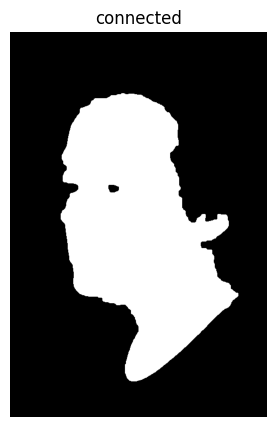

In [17]:
# Step 4 — keep only biggest connected region
num_labels, labels = cv2.connectedComponents(mask_clean)
largest = 1 + np.argmax(np.bincount(labels.ravel())[1:])
final_mask = (labels == largest).astype(np.uint8) * 255

#show
plt.figure(figsize=(15,5))
plt.subplot(1,1,1); plt.title("connected"); plt.imshow(final_mask, cmap='gray'); plt.axis('off')
plt.show()


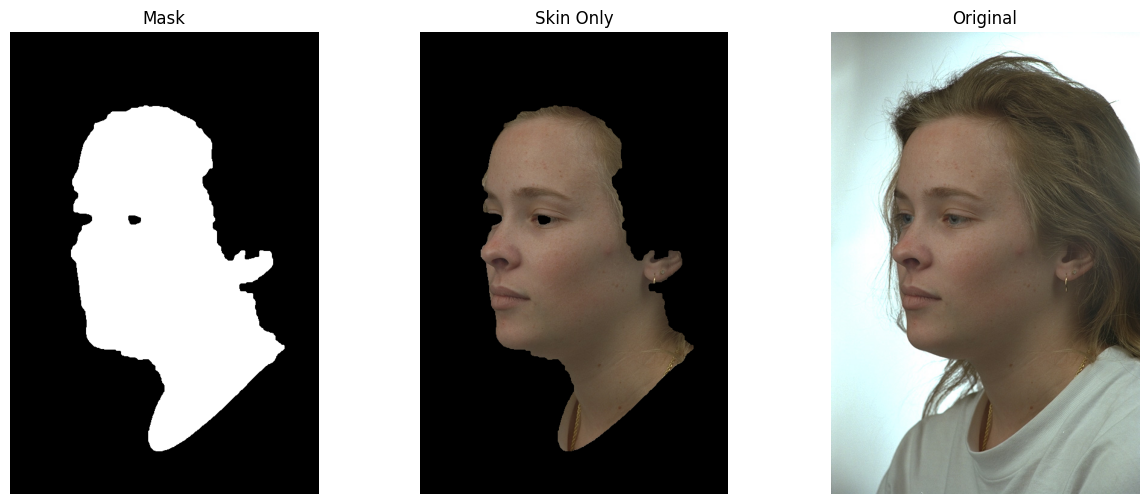

In [13]:
# Apply mask
skin_only = cv2.bitwise_and(img, img, mask=final_mask)

# Show
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.title("Mask"); plt.imshow(final_mask, cmap='gray'); plt.axis('off')
plt.subplot(1,3,2); plt.title("Skin Only"); plt.imshow(skin_only); plt.axis('off')
plt.subplot(1,3,3); plt.title("Original"); plt.imshow(img); plt.axis('off')
plt.show()
